## 决策树的直接调用与Titanic数据集的探索 

In [2]:
# 必要的引入
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### 读取数据并打印基本信息

In [3]:
data = pd.read_csv(os.path.join("./", "titanic.csv"), sep=",")

In [4]:
# 打印数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [5]:
# 观察部分数据的形式
data.head(2)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female


#### 预测目标的基本分布

In [6]:
# TODO 观察预测目标的分布
data.survived.value_counts(normalize=True)

0    0.658035
1    0.341965
Name: survived, dtype: float64

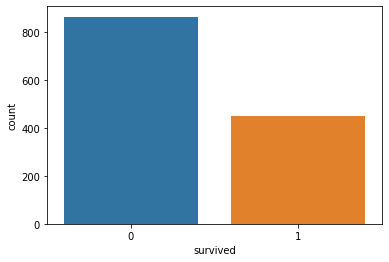

In [7]:
#TODO 可视化预测目标的分布
sns.countplot(data['survived'])

#### 舱位与预测目标的关系

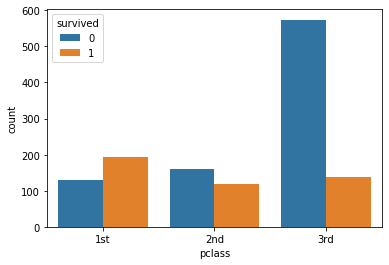

In [125]:
#TODO 利用sns画出每种舱对应的幸存与遇难人数
sns.countplot(data['pclass'],hue=data['survived'])

#### 名字的信息

In [126]:
# TODO 打印部分名字信息
data['name'].value_counts()

Kelly, Mr James                                       2
Connolly, Miss Kate                                   2
Carlsson, Mr Frans Olof                               2
Assam, Mr Ali                                         1
Kekic, Mr Tido                                        1
                                                     ..
Drazonovic, Mr Josef                                  1
Williams, Mr Leslie                                   1
Abbott, Master Eugene Joseph                          1
Slemen, Mr Richard James                              1
Caldwell, Mrs Albert Francis (Sylvia Mae Harbaugh)    1
Name: name, Length: 1310, dtype: int64

#### 对名字属性进行变换  
- 取名字的title

In [127]:
data['name_title'] = data['name'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else x.split(',')[0]).apply(lambda x: x.split()[0])

In [128]:
# TODO 打印name title的value_counts
data['name_title'].value_counts()

Mr           747
Miss         236
Mrs          200
Master        59
Ms            17
Dr             7
Rev            6
Col            2
Colonel        2
Major          2
Thomas         2
Rev.           2
Mansouer       1
Barton         1
Nils           1
Captain        1
Jenny          1
Jonkheer       1
Leo            1
Dr.            1
Seman          1
Ernst          1
the            1
Berglund.      1
Jacobsohn      1
Mlle           1
Eino           1
Delia          1
Richard        1
Mlle.          1
Nikolai        1
Sir            1
William        1
Lady           1
Rene           1
Albert         1
Oscar          1
Hilda          1
Simon          1
Madame         1
W.             1
Khalil         1
Sander         1
Name: name_title, dtype: int64

#### 名字的title与存活与否的关系

In [129]:
# TODO 名字title 平均存活率
data['survived'].groupby(data['name_title']).mean().argsort()

name_title
Albert        0
Barton       41
Berglund.    28
Captain      29
Col          31
Colonel      17
Delia        32
Dr           33
Dr.          14
Eino         13
Ernst        12
Hilda        34
Jacobsohn    10
Jenny        35
Jonkheer     36
Khalil       37
Lady          6
Leo          39
Madame       40
Major         3
Mansouer      2
Master        1
Miss         23
Mlle         25
Mlle.        21
Mr            7
Mrs           4
Ms           19
Nikolai       5
Nils         22
Oscar        26
Rene         27
Rev          38
Rev.          8
Richard       9
Sander       15
Seman        24
Simon        16
Sir          18
Thomas       30
W.           20
William      11
the          42
Name: survived, dtype: int64

#### 取名字的长度

In [130]:
# TODO 新增名字长度的变量
data['name_len']=data['name'].apply(lambda x: len(x))

#### 名字长度与存活与否的关系

In [131]:
# TODO 名字长度分5组,平均生还率
# 忠义神武灵佑仁勇威显关圣大帝  VS  李氏
data['survived'].groupby(pd.qcut(data['name_len'],5)).mean()

name_len
(10.999, 17.0]    0.183746
(17.0, 20.0]      0.288321
(20.0, 24.0]      0.285171
(24.0, 28.0]      0.369295
(28.0, 62.0]      0.611111
Name: survived, dtype: float64

#### 性别的分布与最后幸存的关系

In [132]:
# TODO 打印性别比例
data['sex'].value_counts()

male      850
female    463
Name: sex, dtype: int64

In [133]:
# TODO 性别的平均生还率
data['survived'].groupby(data['sex']).mean()

sex
female    0.663067
male      0.167059
Name: survived, dtype: float64

In [134]:
# TODO 年龄与幸存的关系
data['survived'].groupby(pd.qcut(data['age'],5)).mean()


age
(0.166, 19.0]    0.578125
(19.0, 26.0]     0.354610
(26.0, 33.0]     0.400000
(33.0, 45.0]     0.447761
(45.0, 71.0]     0.443478
Name: survived, dtype: float64

#### 登船的地点与幸存的关系

In [135]:
# TODO 登船地点的分布
data.embarked.value_counts()

Southampton    573
Cherbourg      203
Queenstown      45
Name: embarked, dtype: int64

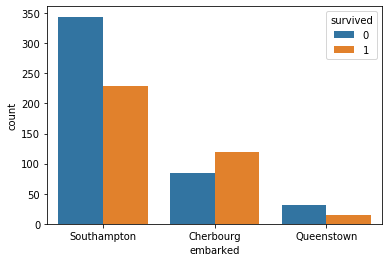

In [136]:
# TODO 登船地点与幸存的关系
data.survived.groupby(data.embarked).mean()
sns.countplot(data['embarked'],hue=data['survived'])

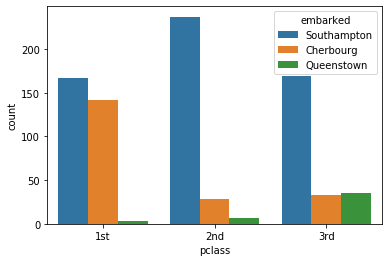

In [137]:
# TODO 可视化登船地点与舱位的关系
sns.countplot(data['pclass'],hue=data['embarked'])

Jack Dawson
20岁
男
三等舱
Southampton, England登船

### 预处理输入数据  
- 去掉不需要的特征  
- 对某些特征进行变换

### -去掉特征: 目的地过于分散   room, ticket, boat缺失数据太多，舍弃不用

In [138]:
data['home.dest'].apply(lambda x :str(x).split(',')[-1]).value_counts()

nan                559
 NY                168
 NJ                 36
 MA                 34
 England            34
                  ... 
 UT                  1
 Peru                1
 NH                  1
 Yorks               1
Austria-Hungary      1
Name: home.dest, Length: 117, dtype: int64

In [139]:
data.isnull().sum(axis = 0)

row.names        0
pclass           0
survived         0
name             0
age            680
embarked       492
home.dest      559
room          1236
ticket        1244
boat           966
sex              0
name_title       0
name_len         0
dtype: int64

In [140]:
# TODO 
# 去掉row.names, room, ticket, boat, home.dest
data = data.drop(['row.names', 'room', 'ticket', 'boat', 'home.dest'],axis=1)
# 在axis 是列的维度上

data.head()

,pclass,survived,name,age,embarked,sex,name_title,name_len
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,female,Miss,28
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,female,Miss,27
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,male,Mr,35
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,female,Mrs,47
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,male,Master,29


### -特征变换
#### 基于原始特征提取
#### 缺失数据的处理  
  1 实值： 中位数或者平均数去补  
  2 类别： major class去补

In [141]:
def name(data):
    data['name_len'] = data['name'].apply(lambda x: len(x))
    data['name_title'] = data['name'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else x.split(',')[0]).apply(lambda x: x.split()[0])
    del data['name']
    return data

def age(data):
    data['age_flag'] = data['age'].apply(lambda x: 1 if pd.isnull(x) else 0)
    grouped_age = data.groupby(['name_title', 'pclass'])['age']
    data['age'] = grouped_age.transform(lambda x: x.fillna(data['age'].mean()) if pd.isnull(x.mean()) else x.fillna(x.mean()))
    return data

def embark(data):
    data['embarked'] = data['embarked'].fillna('Southampton')
    return data


def dummies(data, columns=['pclass','name_title','embarked', 'sex']):
    for col in columns:
        data[col] = data[col].apply(lambda x: str(x))
        new_cols = [col + '_' + i for i in data[col].unique()]
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)[new_cols]], axis=1)
        del data[col]
    return data

In [142]:
# TODO
# 利用name(), age(), embark(), dummies()等函数对数据进行变换
data = name(data)
data = age(data)
data = embark(data)
data = dummies(data)
data.head()

,survived,age,name_len,age_flag,pclass_1st,pclass_2nd,pclass_3rd,name_title_Miss,name_title_Mr,name_title_Mrs,...,name_title_Simon,name_title_William,name_title_Seman,name_title_Rene,name_title_Leo,embarked_Southampton,embarked_Cherbourg,embarked_Queenstown,sex_female,sex_male
0,1,29.0000,28,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,2.0000,27,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,30.0000,35,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,25.0000,47,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,1,0.9167,29,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


####  调用决策树模型并预测结果

In [143]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# 准备训练集合测试集， 测试集大小为0.2， 随机种子为33
trainX, testX, trainY, testY = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.2, random_state=33)


# tree.DecisionTreeClassifier(criterion, max_depth, min_samples_leaf)
# TODO 创建深度为3，叶子节点数不超过5的决策树
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
model.fit(trainX, trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [144]:
from sklearn import metrics
def measure_performance(X, y, model, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    #TODO predict 并生成 measure_performance函数
    y_pred = model.predict(testX)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
    
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

In [145]:
# TODO 调用measure_performance 观察模型在testX, testY上的表现
measure_performance(testX, testY, model)

Accuracy:0.791 

Classification report
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       164
           1       0.88      0.52      0.65        99

    accuracy                           0.79       263
   macro avg       0.82      0.74      0.75       263
weighted avg       0.81      0.79      0.78       263
 

Confusion matrix
[[157   7]
 [ 48  51]] 



#### Bonus part: 利用简单特征直接调用决策树模型

In [146]:
# 利用 age, sex_male, sex_female做训练
sub_columns = ['age','sex_male','sex_female']
sub_trainX = trainX[sub_columns]
sub_testX = testX[sub_columns]
sub_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
sub_model.fit(sub_trainX, trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [147]:
measure_performance(sub_trainX, testY, sub_model)

ValueError: Number of features of the model must match the input. Model n_features is 3 and input n_features is 54 

#### 可视化决策树

In [149]:
import graphviz

dot_data = tree.export_graphviz(model, out_file=None, feature_names=trainX.columns) 

#TODO 生成graph文件
graph =  graphviz.Source(dot_data)
#graph.render("titanic") 
#graph.view()
graph

ModuleNotFoundError: No module named 'graphviz'

#### 展示特征的重要性

In [ ]:
# TODO 观察前20个特征的重要性
pd.concat([pd.DataFrame(trainX.columns, columns=['variable']),
         pd.DataFrame(model.feature_importances_, columns=['importance'])],
         axis=1).sort_values(by='importance', ascending=False)[:20]